# Dynamic Process: With Some Expressive Voters and a CW (6.4)

In [1]:
from matplotlib import pyplot as plt
from poisson_approval import *

In [2]:
N_SAMPLES = 10000
N_MAX_EPISODES = 1000
DENOMINATOR = 20

In [3]:
d_ratio_results = {}
for numerator in range(DENOMINATOR + 1):
    ratio_fanatic = numerator / DENOMINATOR
    rand_profile = RandConditional(
        factory=RandProfileHistogramUniform(n_bins=1, ratio_fanatic=ratio_fanatic),
        test=is_condorcet,
        n_trials_max=None
    )
    d_ratio_results[ratio_fanatic] = monte_carlo_fictitious_play(
        factory=rand_profile,
        n_samples=N_SAMPLES,
        n_max_episodes=N_MAX_EPISODES,
        voting_rules=VOTING_RULES,
        init='random_tau',
        monte_carlo_settings=[
            MCS_FREQUENCY_CW_WINS
        ],
        file_save='sav/with_expressive_voters_and_CW_%s_%s.sav' % (numerator, DENOMINATOR),
    )

In [4]:
ratios_fanatic = d_ratio_results.keys()
results_av = [float(d_ratio_results[ratio_fanatic][APPROVAL]['mean_frequency_cw_wins'])
              for ratio_fanatic in ratios_fanatic]
results_pl = [float(d_ratio_results[ratio_fanatic][PLURALITY]['mean_frequency_cw_wins'])
              for ratio_fanatic in ratios_fanatic]
results_apl = [float(d_ratio_results[ratio_fanatic][ANTI_PLURALITY]['mean_frequency_cw_wins'])
               for ratio_fanatic in ratios_fanatic]

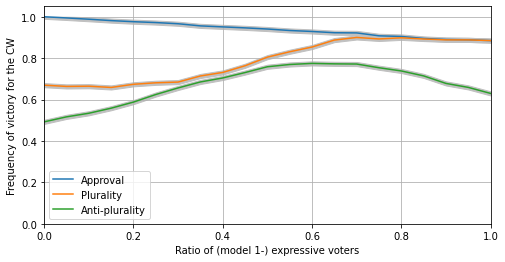

In [5]:
fig, ax = plt.subplots(figsize=(8, 4))
plt_plot_with_error(ratios_fanatic, results_av, N_SAMPLES, label=APPROVAL)
plt_plot_with_error(ratios_fanatic, results_pl, N_SAMPLES, label=PLURALITY)
plt_plot_with_error(ratios_fanatic, results_apl, N_SAMPLES, label=ANTI_PLURALITY)
plt.grid(True)
plt.legend()
plt.xlabel('Ratio of (model 1-) expressive voters')
plt.ylabel('Frequency of victory for the CW')
plt.xlim(0, 1)
plt.ylim(0, 1.05)
plt.savefig('img/fCW_fanatic.png', dpi=600, bbox_inches="tight")